<a href="https://colab.research.google.com/github/sidpatondikar/Regression-Project/blob/main/Transport_Demand_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Transport Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 - Siddharth Patondikar**
##### **Team Member 2 - Chetan Badgujar**


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/sidpatondikar/Regression-Project

# **Problem Statement**


## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Uber Movement traffic data can be accessed [here](https://movement.uber.com). Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [3]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Regression Project/train_revised.csv')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

print(f'There are {df.shape[0]} rows and {df.shape[1]} columns')


There are 51645 rows and 10 columns


### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated().value_counts()

False    51645
dtype: int64

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

### What did you know about your dataset?

In the above data:
1. There are no duplicate rows
2. There are no null values

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

In [10]:
# Dataset Describe
df.describe(include='object')

,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type
count,51645,51645,51645,51645,51645,51645,51645,51645
unique,61,2,51645,149,78,17,1,2
top,1,Mpesa,UZUEHCBUSO,10-12-17,7:09,Kisii,Nairobi,Bus
freq,2065,51532,1,856,3926,22607,51645,31985


### Variables Description

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
df.describe(include='object').iloc[1,:]

seat_number           61
payment_method         2
payment_receipt    51645
travel_date          149
travel_time           78
travel_from           17
travel_to              1
car_type               2
Name: unique, dtype: object

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.
df.head(3)

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49


There is no specified target variable in the data.

According to business problem, it requires us to predict the number of tickets we can sell on a particular route and particular date and time. Hence, a new column is created for number of tickets by grouping the data on ride_id

In [13]:
#Checking number of unique ride ids
len(df['ride_id'].unique())

6249

In [14]:
#Making target variable 'number of ticket' by grouping the dataframe on ride_id column
temp_df = df.groupby('ride_id')['seat_number'].count().reset_index()
temp_df.rename(columns = {'seat_number':'number_of_ticket'},inplace=True)
temp_df.head()

,ride_id,number_of_ticket
0,1442,1
1,5437,1
2,5710,1
3,5777,5
4,5778,31


In [15]:
#Dropping constant column travel_to and other unuseful columns
df.drop(['seat_number','payment_method','payment_receipt','travel_to'],axis=1, inplace=True)
df.shape

(51645, 6)

In [16]:
#Dropping duplicates
df.drop_duplicates('ride_id',inplace=True)
df.shape

(6249, 6)

In [17]:
# Merging this new dataframe with orginal dataframe on column ride_id
df = df.merge(temp_df, how='left', on='ride_id')
df.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket
0,1442,17-10-17,7:15,Migori,Bus,49,1
1,5437,19-11-17,7:12,Migori,Bus,49,1
2,5710,26-11-17,7:05,Keroka,Bus,49,1
3,5777,27-11-17,7:10,Homa Bay,Bus,49,5
4,5778,27-11-17,7:12,Migori,Bus,49,31


In [18]:
#Creating a column date_time which is a combination of columns travel_date and travel_time
df['date_time'] = pd.to_datetime(df['travel_date'] +" "+ df['travel_time'])
df['travel_date'] = pd.to_datetime(df['travel_date'])

In [19]:
df_copy = df.copy()

In [20]:
#Creating additonal features with travel_date and travel_time columns

#Creating a function to add the above features
def create_date_cols(df_temp):
  df_temp['travel_month'] = df_temp['travel_date'].dt.month
  df_temp['travel_year'] = df_temp['travel_date'].dt.year
  df_temp['travel_day_of_month'] = df_temp['travel_date'].dt.day
  df_temp['travel_day_of_year'] = df_temp['travel_date'].dt.dayofyear
  df_temp['travel_day_of_week'] = df_temp['travel_date'].dt.dayofweek
  df_temp['travel_hour'] = pd.to_datetime(df_temp['travel_time']).dt.hour
  df_temp['quarter'] = df_temp['travel_date'].dt.quarter
  df_temp['is_weekend'] = df_temp['travel_day_of_week'].apply(lambda x: 1 if x in [5,6] else 0)

  return df_temp

#Applying function on our dataframe
df_copy = create_date_cols(df_copy)

In [21]:
df_copy.columns

Index(['ride_id', 'travel_date', 'travel_time', 'travel_from', 'car_type',
       'max_capacity', 'number_of_ticket', 'date_time', 'travel_month',
       'travel_year', 'travel_day_of_month', 'travel_day_of_year',
       'travel_day_of_week', 'travel_hour', 'quarter', 'is_weekend'],
      dtype='object')

In [22]:
df_copy.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date_time,travel_month,travel_year,travel_day_of_month,travel_day_of_year,travel_day_of_week,travel_hour,quarter,is_weekend
0,1442,2017-10-17,7:15,Migori,Bus,49,1,2017-10-17 07:15:00,10,2017,17,290,1,7,4,0
1,5437,2017-11-19,7:12,Migori,Bus,49,1,2017-11-19 07:12:00,11,2017,19,323,6,7,4,1
2,5710,2017-11-26,7:05,Keroka,Bus,49,1,2017-11-26 07:05:00,11,2017,26,330,6,7,4,1
3,5777,2017-11-27,7:10,Homa Bay,Bus,49,5,2017-11-27 07:10:00,11,2017,27,331,0,7,4,0
4,5778,2017-11-27,7:12,Migori,Bus,49,31,2017-11-27 07:12:00,11,2017,27,331,0,7,4,0


In [23]:
#Converting travel_time column into integer format
df_copy['travel_time'] = df_copy['travel_time'].str.split(':').apply(lambda x: round(int(x[0]) + int(x[1])/60 ,2) )

In [24]:
#Creating function that defines periods for time intervals
def get_period(hour):
  if hour<7: return 'em'
  elif hour>=7 and hour<=11: return 'mor'
  elif hour>11 and hour<=15: return 'an'
  elif hour>15 and hour<=19: return 'evn'
  elif hour>19 and hour<=24: return 'nght'

df_copy['time_period_of_day'] = df_copy['travel_hour'].apply(get_period)

In [25]:
df_copy.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date_time,travel_month,travel_year,travel_day_of_month,travel_day_of_year,travel_day_of_week,travel_hour,quarter,is_weekend,time_period_of_day
0,1442,2017-10-17,7.25,Migori,Bus,49,1,2017-10-17 07:15:00,10,2017,17,290,1,7,4,0,mor
1,5437,2017-11-19,7.20,Migori,Bus,49,1,2017-11-19 07:12:00,11,2017,19,323,6,7,4,1,mor
2,5710,2017-11-26,7.08,Keroka,Bus,49,1,2017-11-26 07:05:00,11,2017,26,330,6,7,4,1,mor
3,5777,2017-11-27,7.17,Homa Bay,Bus,49,5,2017-11-27 07:10:00,11,2017,27,331,0,7,4,0,mor
4,5778,2017-11-27,7.20,Migori,Bus,49,31,2017-11-27 07:12:00,11,2017,27,331,0,7,4,0,mor


### What all manipulations have you done and insights you found?

1. Created target variable 'number_of_ticket'
2. Dropped constant and non essential columns
3. Used travel_date and travel_time columns to extract and create datetime related features
4. Created period feature from travel time for data visualization

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [26]:
import warnings
warnings.filterwarnings('ignore')

#### Chart - 1

Text(0.5, 1.0, 'Distribution of tickets')

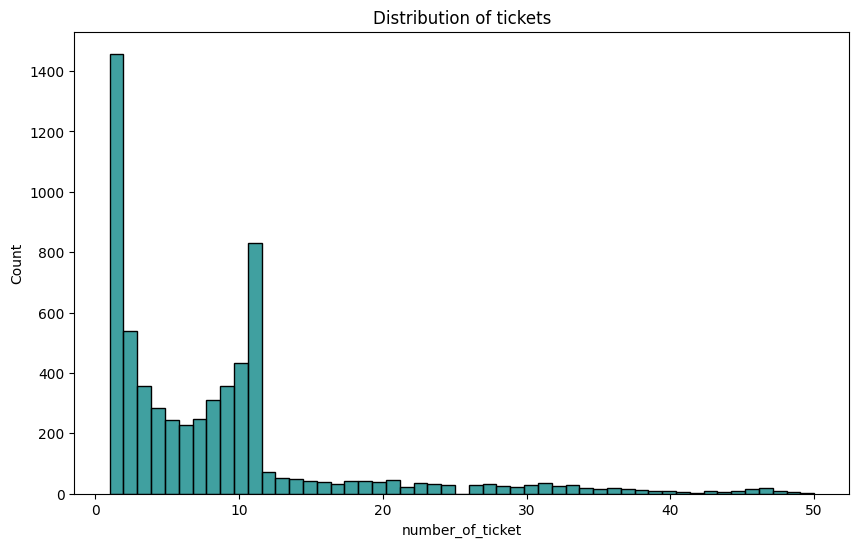

In [27]:
# Chart - 1 visualization code
#Histogram for distribution of tickets
plt.figure(figsize=(10,6))
sns.histplot(df_copy['number_of_ticket'], color='teal')
plt.title("Distribution of tickets")

##### What is/are the insight(s) found from the chart?

From data, usually number of tickets bought per ride_id is between 1 and 12

#### Chart - 2

Text(0, 0.5, 'Count')

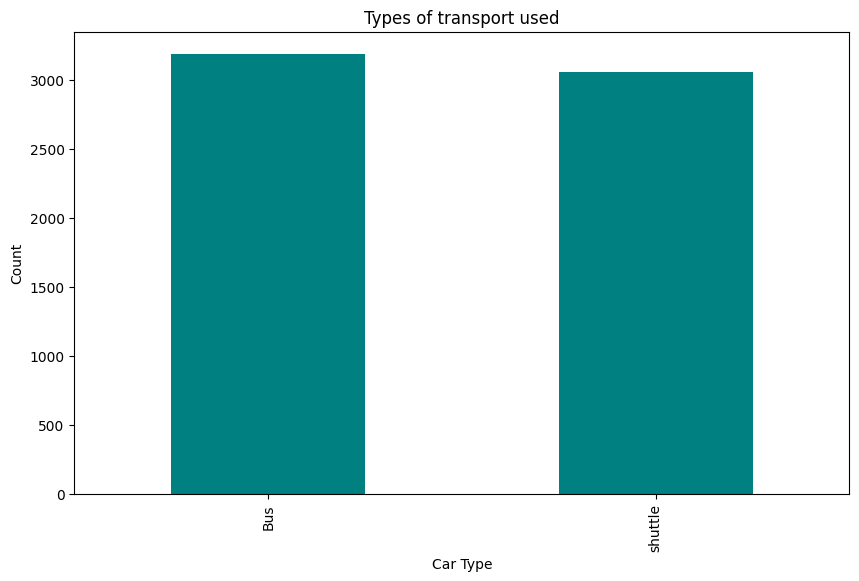

In [28]:
# Chart - 2 visualization code
#Bar chart for types of transport used
plt.figure(figsize=(10,6))
df_copy['car_type'].value_counts().plot(kind='bar',color='teal')
plt.title("Types of transport used")
plt.xlabel('Car Type')
plt.ylabel('Count')

##### What is/are the insight(s) found from the chart?

The number of Buses and shuttle are nearly equal in the data. Hence, both type of cars are used equally for traveling.

#### Chart - 3

Text(0, 0.5, 'Count')

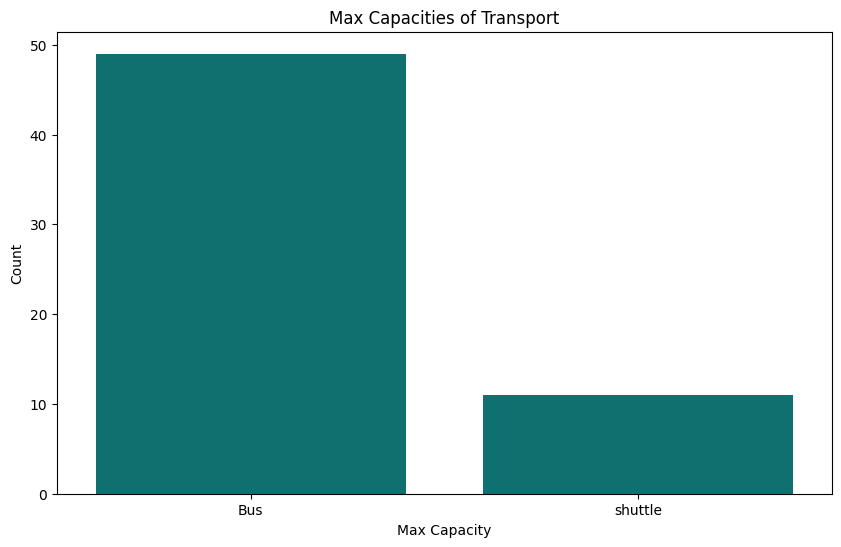

In [29]:
# Chart - 3 visualization code

#Bar chart for Max Capacities of transport
plt.figure(figsize=(10,6))
sns.barplot(data=df_copy, x='car_type', y='max_capacity', color='teal')
plt.title("Max Capacities of Transport")
plt.xlabel('Max Capacity')
plt.ylabel('Count')

###### What is/are the insight(s) found from the chart?

Buses have max capacity of bus is 49, whereas max capacity of shuttle is 11.

#### Chart - 4

Text(0, 0.5, 'Number of Tickets')

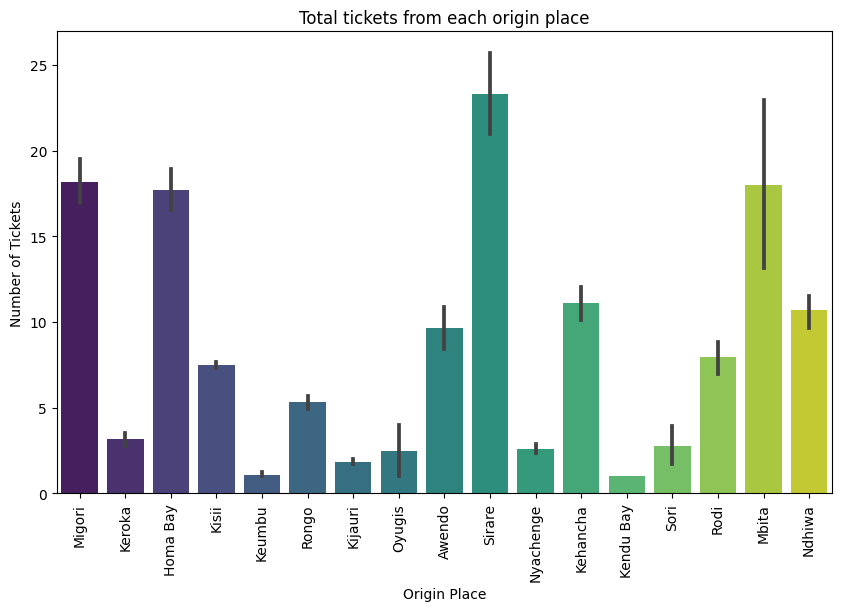

In [30]:
# Chart - 4 visualization code

#Bar chart for total number of ticket from each origin place
plt.figure(figsize=(10,6))
sns.barplot(data=df_copy,x='travel_from',y='number_of_ticket', palette='viridis')
plt.xticks(rotation=90)
plt.title('Total tickets from each origin place')
plt.xlabel('Origin Place')
plt.ylabel('Number of Tickets')

#####  What is/are the insight(s) found from the chart?

Most number of tickets are sold from:
1. Sirare
2. Mbita
3. Migori

While the least number of tickets are sold from:
1. Keumbu
2. Kendu Bay

#### Chart - 5

Text(0, 0.5, 'Count')

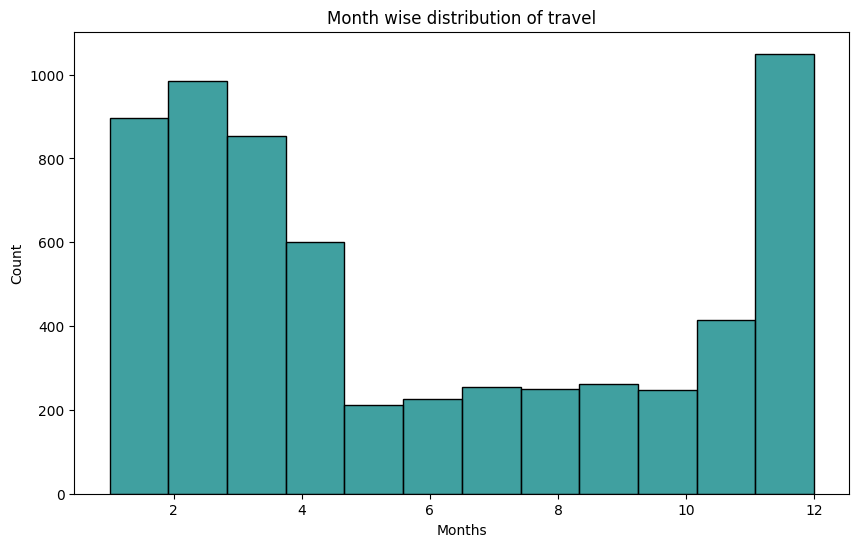

In [31]:
# Chart - 5 visualization code

#Monthwise Distribution of travellers

plt.figure(figsize=(10,6))
sns.histplot(df_copy['travel_month'],bins=12, color='teal')
plt.title('Month wise distribution of travel')
plt.xlabel('Months')
plt.ylabel('Count')

##### What is/are the insight(s) found from the chart?

Most of the traveling is done in the months of January, February and December.

#### Chart - 6

Text(0, 0.5, 'Count')

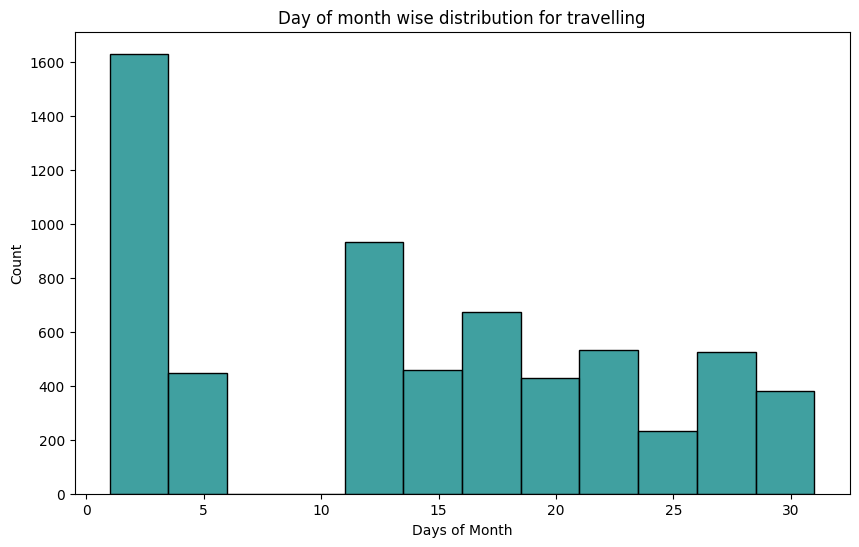

In [32]:
# Chart - 6 visualization code
#Day of Monthwise Distribution of travellers
plt.figure(figsize=(10,6))
sns.histplot(df_copy['travel_day_of_month'],bins=12, color='teal')
plt.title('Day of month wise distribution for travelling')
plt.xlabel('Days of Month')
plt.ylabel('Count')

##### What is/are the insight(s) found from the chart?

Most of the traveling is done from before 5th of the month, there seems to be no traveling done between 5th and 11th of the month. This can be because of transport holiday during this period every month.

#### Chart - 7

Text(0.5, 1.0, 'Number of tickets for every day of month')

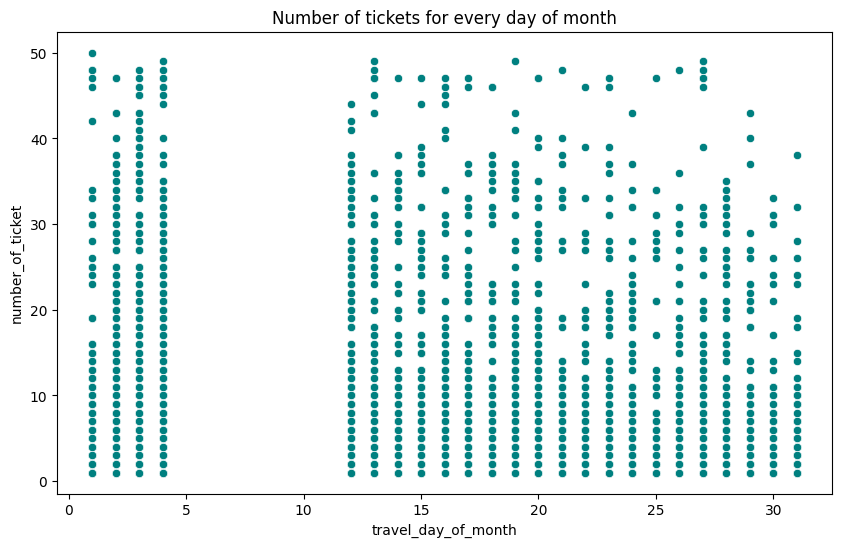

In [33]:
# Chart - 7 visualization code

#Scatterplot of number of tickets sold for everyday of the month
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_copy, x='travel_day_of_month',y='number_of_ticket',color='teal')
plt.title('Number of tickets for every day of month')

##### What is/are the insight(s) found from the chart?

Similar to above graph, we can see there are no tickets sold between 5th and 11th of every month. Transport may be closed during this period every month because of tranport holiday.

#### Chart - 8

Text(0.5, 1.0, 'Number of tickets for each hour of day')

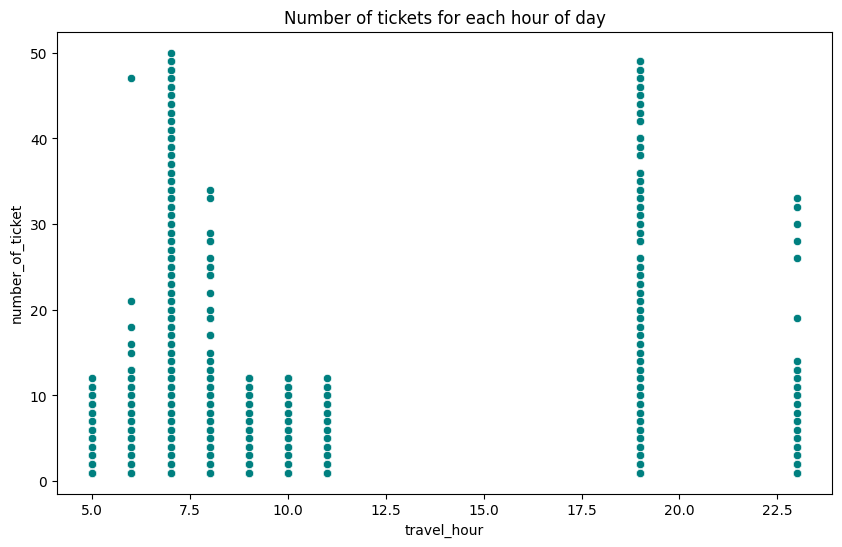

In [34]:
# Chart - 8 visualization code

#Scatterplot for number of tickets in every hour of day.
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_copy, x='travel_hour',y='number_of_ticket',color='teal')
plt.title('Number of tickets for each hour of day')

##### What is/are the insight(s) found from the chart?

In the day, most tickets are sold at 7AM and close to 7PM. This can be because people going to and returning from work in Nairobi at these times. Similarly, there are no tickets sold between 12PM and 5:30 PM.

#### Chart - 9

Text(0.5, 1.0, 'Number of tickets for each period of day')

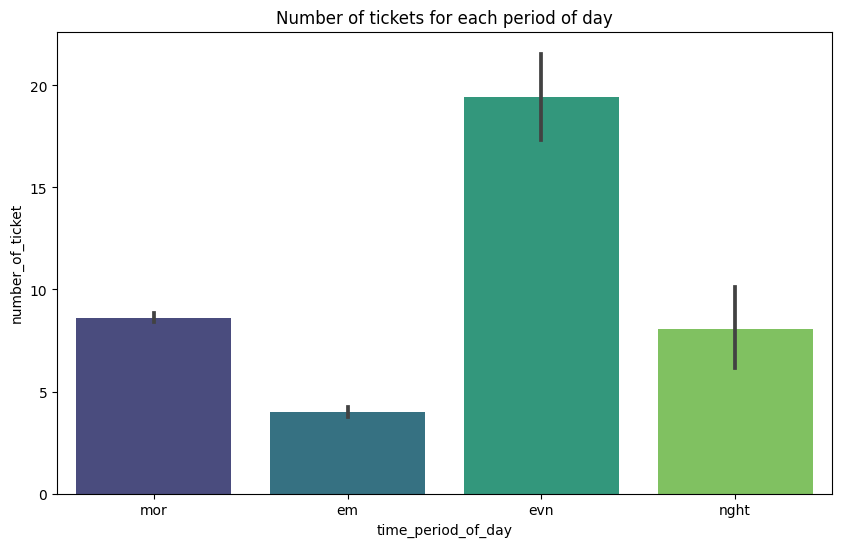

In [35]:
# Chart - 9 visualization code

#Bar chart for Number of tickets for each period of day
plt.figure(figsize=(10,6))
sns.barplot(data=df_copy, x='time_period_of_day',y='number_of_ticket', palette='viridis')
plt.title('Number of tickets for each period of day')

##### What is/are the insight(s) found from the chart?

Most number of tickets are sold in evening followed by morning hours.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [36]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [37]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [38]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [39]:
# Manipulate Features to minimize feature correlation and create new features
period_dict = dict(df_copy.time_period_of_day.value_counts())
df_copy['travel_hour_wise_weights'] = np.log1p(df_copy.time_period_of_day.map(period_dict))

# Creating a seperate column for giving day of a year wise weights for the hours column
day_of_year_dict = dict(df_copy.travel_day_of_year.value_counts())
df_copy['travel_day_of_year_wise_weights'] = np.log1p(df_copy.travel_day_of_year.map(day_of_year_dict))

# Giving weights to the each days of the month based on the frequency of ticket bookings
day_of_month_wise_weights_dict = {2:1, 12:1, 3:1, 4:2, 1:3, 13:3, 14:3, 16:3, 28:3, 19:3, 18:3, 15:3, 17:3, 20:3, 22:4, 21:4, 27:4, 29:4, 23:4, 24:4, 26:4, 30:4, 25:4, 31:4}
df_copy['travel_day_of_month_wise_weights'] = df_copy.travel_day_of_month.replace(day_of_month_wise_weights_dict)

# Creating a column for giving weights to the each months of a year based on the frequency of ticket bookings
travel_month_wise_weights_dict = {12: 1,
 2: 1,
 1: 1,
 3: 1,
 4: 1,
 11: 2,
 9: 3,
 7: 3,
 8: 3,
 10: 3,
 6: 3,
 5: 3}
df_copy['travel_month_wise_weights'] = df_copy.travel_month.replace(travel_month_wise_weights_dict)

In [40]:
df_copy.head(3)

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date_time,travel_month,travel_year,...,travel_day_of_year,travel_day_of_week,travel_hour,quarter,is_weekend,time_period_of_day,travel_hour_wise_weights,travel_day_of_year_wise_weights,travel_day_of_month_wise_weights,travel_month_wise_weights
0,1442,2017-10-17,7.25,Migori,Bus,49,1,2017-10-17 07:15:00,10,2017,...,290,1,7,4,0,mor,8.512382,0.693147,3,3
1,5437,2017-11-19,7.20,Migori,Bus,49,1,2017-11-19 07:12:00,11,2017,...,323,6,7,4,1,mor,8.512382,0.693147,3,2
2,5710,2017-11-26,7.08,Keroka,Bus,49,1,2017-11-26 07:05:00,11,2017,...,330,6,7,4,1,mor,8.512382,0.693147,4,2


#### 2. Feature Selection

In [41]:
# Select your features wisely to avoid overfitting
def find_difference_bw_bus(data):

  data.sort_values(["travel_from","date_time"],inplace=True,ascending=True)
  data["Time_gap_btw_0_1_next_bus"]=(data["date_time"]-data.groupby(["travel_from"]).date_time.shift(-1)).dt.total_seconds()/3600
  data["Time_gap_btw_0_1_previous_bus"]=(data["date_time"]-data.groupby(["travel_from"]).date_time.shift(1)).dt.total_seconds()/3600
  data["Time_gap_btw_0_2_next_bus"]=(data["date_time"]-data.groupby(["travel_from"]).date_time.shift(-2)).dt.total_seconds()/3600
  data["Time_gap_btw_0_2_previous_bus"]=(data["date_time"]-data.groupby(["travel_from"]).date_time.shift(2)).dt.total_seconds()/3600
  data["Time_gap_btw_0_3_next_bus"]=(data["date_time"]-data.groupby(["travel_from"]).date_time.shift(-3)).dt.total_seconds()/3600
  data["Time_gap_btw_0_3_previous_bus"]=(data["date_time"]-data.groupby(["travel_from"]).date_time.shift(3)).dt.total_seconds()/3600
  data["Time_gap_btw_next_previous_bus"]=(data.groupby(["travel_from"]).date_time.shift(-1)-data.groupby(["travel_from"]).date_time.shift(1)).dt.total_seconds()/3600
  cols=["Time_gap_btw_0_1_next_bus", "Time_gap_btw_0_1_previous_bus", "Time_gap_btw_0_2_next_bus","Time_gap_btw_0_2_previous_bus",
      "Time_gap_btw_0_3_next_bus", "Time_gap_btw_0_3_previous_bus",
      "Time_gap_btw_next_previous_bus"]
  data[cols]=data.groupby(["travel_from"])[cols].fillna(method="ffill")
  data[cols]=data.groupby(["travel_from"])[cols].fillna(method="backfill")


  return data

In [42]:
transport_data_new = find_difference_bw_bus(df_copy)

In [43]:
# Making a dictionary containing distances of originating places from nairobi
distance_from_nairobi = {'Awendo':351, 'Homa Bay':360, 'Kehancha': 387.7, 'Keroka': 280, 'Keumbu':295, 'Kijauri':271,
                         'Kisii':305.1, 'Mbita':401, 'Migori': 370, 'Ndhiwa': 371, 'Nyachenge':326, 'Rodi':348, 'Rongo':332,
                         'Sirare':392, 'Sori':399}

transport_data_new['distance_to_destination'] = transport_data_new['travel_from'].map(distance_from_nairobi)

In [44]:
transport_data_new.columns

Index(['ride_id', 'travel_date', 'travel_time', 'travel_from', 'car_type',
       'max_capacity', 'number_of_ticket', 'date_time', 'travel_month',
       'travel_year', 'travel_day_of_month', 'travel_day_of_year',
       'travel_day_of_week', 'travel_hour', 'quarter', 'is_weekend',
       'time_period_of_day', 'travel_hour_wise_weights',
       'travel_day_of_year_wise_weights', 'travel_day_of_month_wise_weights',
       'travel_month_wise_weights', 'Time_gap_btw_0_1_next_bus',
       'Time_gap_btw_0_1_previous_bus', 'Time_gap_btw_0_2_next_bus',
       'Time_gap_btw_0_2_previous_bus', 'Time_gap_btw_0_3_next_bus',
       'Time_gap_btw_0_3_previous_bus', 'Time_gap_btw_next_previous_bus',
       'distance_to_destination'],
      dtype='object')

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 2. Handling Missing Values

In [45]:
# Handling Missing Values & Missing Value Imputation
transport_data_new.isnull().sum()

ride_id                             0
travel_date                         0
travel_time                         0
travel_from                         0
car_type                            0
max_capacity                        0
number_of_ticket                    0
date_time                           0
travel_month                        0
travel_year                         0
travel_day_of_month                 0
travel_day_of_year                  0
travel_day_of_week                  0
travel_hour                         0
quarter                             0
is_weekend                          0
time_period_of_day                  0
travel_hour_wise_weights            0
travel_day_of_year_wise_weights     0
travel_day_of_month_wise_weights    0
travel_month_wise_weights           0
Time_gap_btw_0_1_next_bus           1
Time_gap_btw_0_1_previous_bus       1
Time_gap_btw_0_2_next_bus           3
Time_gap_btw_0_2_previous_bus       3
Time_gap_btw_0_3_next_bus           3
Time_gap_btw

In [46]:
transport_data_new.dropna(inplace=True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [47]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [48]:
# Encode your categorical columns
from sklearn import preprocessing
final_df = pd.get_dummies(df_copy, columns = ['travel_from','travel_day_of_month_wise_weights','travel_month_wise_weights'])

In [49]:
label_encoder = {'Bus':1,'shuttle':0}
final_df.replace(label_encoder, inplace=True)
final_df.head()

,ride_id,travel_date,travel_time,car_type,max_capacity,number_of_ticket,date_time,travel_month,travel_year,travel_day_of_month,...,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,travel_day_of_month_wise_weights_1,travel_day_of_month_wise_weights_2,travel_day_of_month_wise_weights_3,travel_day_of_month_wise_weights_4,travel_month_wise_weights_1,travel_month_wise_weights_2,travel_month_wise_weights_3
502,6654,2017-05-12,7.13,1,49,2,2017-05-12 07:08:00,5,2017,12,...,0,0,0,1,0,0,0,0,0,1
5530,12926,2018-01-04,7.13,1,49,20,2018-01-04 07:08:00,1,2018,4,...,0,0,0,0,1,0,0,1,0,0
5533,12929,2018-01-04,7.20,1,49,2,2018-01-04 07:12:00,1,2018,4,...,0,0,0,0,1,0,0,1,0,0
5539,12935,2018-01-04,7.22,1,49,9,2018-01-04 07:13:00,1,2018,4,...,0,0,0,0,1,0,0,1,0,0
5528,12924,2018-01-04,8.00,1,49,15,2018-01-04 08:00:00,1,2018,4,...,0,0,0,0,1,0,0,1,0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [50]:
# Transform Your data

### 8. Data Splitting

In [51]:
# Split your data to train and test. Choose Splitting ratio wisely.
cols_to_drop = ['ride_id','travel_date','travel_time','max_capacity','travel_year','number_of_ticket','time_period_of_day','date_time']
X = final_df.drop(cols_to_drop,axis=1)
X.shape

(6246, 40)

In [52]:
y = final_df['number_of_ticket'].values
y.shape

(6246,)

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
X_train.shape

(4996, 40)

In [55]:
y_train.shape

(4996,)

##### What data splitting ratio have you used and why?

Answer Here.

## ***7. ML Model Implementation***

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error
import math

In [57]:
#Creating function for evaluation metrics
def evaluate_metric(actual,predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))
  print('R2 Score is {}'.format(r2_score(actual, predicted)))

### ML Model - 1 : Linear Regression

In [58]:
# ML Model - 1 Implementation
regressor = LinearRegression()

# Fit the Algorithm
regressor.fit(X_train,y_train)
# Predict on the model

y_train_pred = regressor.predict(X_train)

y_test_pred = regressor.predict(X_test)

#### Explain the ML Model used and it's performance using Evaluation metric.

In [59]:
# Visualizing evaluation Metric Score chart

#Train data evaluation
evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 43.43561405291802
RMSE is 6.590570085578183
MAE is 4.484406828267138
MAPE is 148.91423987028952
R2 Score is 0.39719989780390974
Adjusted R2 :  0.39233370121705935


In [60]:
#Test data evaluation
evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 52.96002583741157
RMSE is 7.277363934654606
MAE is 4.977019809431187
MAPE is 172.11148198723947
R2 Score is 0.37169086447120725
Adjusted R2 :  0.3509031345943241


Linear Regression is not giving good results on data, hence trying regularized linear regression models

### ML Model - 2 : Lasso

In [61]:
# ML Model - 2 Implementation
lasso  = Lasso(alpha=0.1 , max_iter= 3000)

# Fit the Algorithm
lasso.fit(X_train, y_train)

# Predict on the model
y_train_pred = lasso.predict(X_train)

y_test_pred = lasso.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric.

In [62]:
#Train data evaluation
evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 46.09928244626059
RMSE is 6.789645237143144
MAE is 4.703009854825812
MAPE is 158.35076786865065
R2 Score is 0.3602334679574891
Adjusted R2 :  0.35506885417712575


In [63]:
#Test data evaluation
evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 54.82541268172894
RMSE is 7.404418456687124
MAE is 5.157079713090387
MAPE is 177.32299762669288
R2 Score is 0.3495602182517734
Adjusted R2 :  0.3280402916430645


#### 2. Cross- Validation & Hyperparameter Tuning

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
# ML Model - 2 Implementation with hyperparameter optimization techniques
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)

# Fit the Algorithm
lasso_regressor.fit(X, y)

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

# Predict on the model
y_train_pred = lasso_regressor.predict(X_train)

y_test_pred = lasso_regressor.predict(X_test)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -57.88818450944035


In [66]:
#Train data evaluation
evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 53.24727675406492
RMSE is 7.2970731635406345
MAE is 5.270690024143427
MAPE is 177.26852977999286
R2 Score is 0.26103349592550495
Adjusted R2 :  0.2550680751055292


In [67]:
#Test data evaluation
evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 60.85532575215573
RMSE is 7.800982358149243
MAE is 5.585861235704595
MAPE is 190.07364284212179
R2 Score is 0.2780223100146275
Adjusted R2 :  0.25413553780667464


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used to tune hyperparameter, The best fit alpha value is found out to be : {'alpha': 0.01}

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The model has accuracy has decreased overall and does not give good results.

### ML Model - 3 : Ridge

In [68]:
# ML Model - 3 Implementation
ridge = Ridge()

# Fit the Algorithm
ridge.fit(X_train,y_train)

# Predict on the model
y_train_pred = ridge.predict(X_train)

y_test_pred = ridge.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric.

In [69]:
#Train data evaluation
evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 43.43850688463124
RMSE is 6.590789549411454
MAE is 4.484370918851817
MAPE is 148.9320836959902
R2 Score is 0.3971597510420788
Adjusted R2 :  0.3922932303643155


In [70]:
#Test data evaluation
evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 52.969472497181975
RMSE is 7.27801294978114
MAE is 4.9782376536385495
MAPE is 172.1336337623289
R2 Score is 0.3715787908356656
Adjusted R2 :  0.35078735298076613


#### 2. Cross- Validation & Hyperparameter Tuning

In [71]:
# ML Model - 3 Implementation with hyperparameter optimization techniques
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)

# Fit the Algorithm
ridge_regressor.fit(X,y)

# Predict on the model
y_train_pred = ridge_regressor.predict(X_train)

y_test_pred = ridge_regressor.predict(X_test)

In [72]:
#Train data evaluation
evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 43.531188712586605
RMSE is 6.59781696567786
MAE is 4.497597499709052
MAPE is 149.76985664484118
R2 Score is 0.3958735112459715
Adjusted R2 :  0.39099660719952123


In [73]:
#Test data evaluation
evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 52.40847393107056
RMSE is 7.239369719186233
MAE is 4.959179747224484
MAPE is 171.70800259395358
R2 Score is 0.3782343866087582
Adjusted R2 :  0.35766315043369634


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used to tune hyperparameter, The best fit alpha value is found out to be : {'alpha': 1}

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

GridSearchCV has little effect on L2 Regression, has not changed the model accuracy much and overfitting still exists.

### Now testing Non Linear models

### ML Model - 4 : Random Forest

In [76]:
# ML Model - 4 Implementation
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

# Fit the Algorithm
rfr.fit(X_train,y_train)

# Predict on the model
y_train_pred = rfr.predict(X_train)

y_test_pred = rfr.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [77]:
#Train data evaluation
evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 3.824254757066876
RMSE is 1.9555701872003663
MAE is 1.2602935320228654
MAPE is 37.54652959514797
R2 Score is 0.9469269352201335
Adjusted R2 :  0.9464984947375513


In [78]:
#Test data evaluation
evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 29.75605369001493
RMSE is 5.454910969943958
MAE is 3.370032533777334
MAPE is 102.90318797151694
R2 Score is 0.6469790171908384
Adjusted R2 :  0.6352992493559613


Looks like the model causes overfitting, hence trying hyperparameter tuning.

#### 2. Cross- Validation & Hyperparameter Tuning

In [79]:
# ML Model - 4 Implementation with hyperparameter optimization techniques
n_estimators = [int(x) for x in np.linspace(start = 400, stop = 1000, num = 4)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(40, 100, num = 4)]
max_depth.append(None)

# Create the parameters grid
grid_params_dict = {'n_estimators': n_estimators,
               'max_depth': max_depth
                    }
print(grid_params_dict)


rfr = RandomForestRegressor()

# Grid Search of parameters, using 3 fold cross validation,
rf_gridCV = GridSearchCV(estimator = rfr, param_grid = grid_params_dict, cv = 3, verbose=2, n_jobs = -1)

# Fit the Algorithm
rf_gridCV.fit(X,y)


print(rf_gridCV.best_params_)

{'n_estimators': [400, 600, 800, 1000], 'max_depth': [40, 60, 80, 100, None]}
Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'max_depth': 40, 'n_estimators': 600}


In [80]:
rf_gridCV.best_estimator_

RandomForestRegressor(max_depth=40, n_estimators=600)

In [81]:
#Taking best params and creating a new regressor
rf_grid_optimal_model =rf_gridCV.best_estimator_

# Predict on the model
y_train_pred = rf_grid_optimal_model.predict(X_train)

y_test_pred = rf_grid_optimal_model.predict(X_test)

In [82]:
#Train data evaluation
evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 3.6815742274546652
RMSE is 1.9187428768479287
MAE is 1.244907521659203
MAPE is 36.934150674213015
R2 Score is 0.9489070577464744
Adjusted R2 :  0.9484946021076972


In [83]:
#Test data evaluation
evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 4.074314511287031
RMSE is 2.0184931288679264
MAE is 1.2984005137543995
MAPE is 37.56904960775419
R2 Score is 0.9516629950990166
Adjusted R2 :  0.9500637558963373


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used to tune hyperparameter, The best hyperparameter values are:
{'max_depth': 40, 'n_estimators': 600}

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

By using GridSearchCV, the training accuracy have increase slightly, but the test accuracy has increased a lot, hence, the problem of overfitting which was faced in train_test_split method is removed.

### ML Model - 5 : XGBoost

In [84]:
# ML Model - 5 Implementation
import xgboost as xgb
xgbr = xgb.XGBRegressor()

# Fit the Algorithm
xgbr.fit(X_train,y_train)

# Predict on the model
y_train_pred = xgbr.predict(X_train)

y_test_pred = xgbr.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [85]:
#Train data evaluation
evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 4.154984365318293
RMSE is 2.0383778759882314
MAE is 1.4234756090442648
MAPE is 42.24643088316468
R2 Score is 0.9423370647647431
Adjusted R2 :  0.9418715718465978


In [86]:
#Test data evaluation
evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 30.22009912779302
RMSE is 5.497281066835952
MAE is 3.43176274935659
MAPE is 102.30671751554614
R2 Score is 0.6414736575682517
Adjusted R2 :  0.6296117438401541


Looks like the model causes overfitting, hence trying hyperparameter tuning.

#### 2. Cross- Validation & Hyperparameter Tuning

In [87]:
# ML Model - 5 Implementation with hyperparameter optimization techniques
n_estimators = [int(x) for x in np.linspace(start = 400, stop = 1000, num = 4)]

max_depth= [6, 8, 10, 12]
min_child_weight= [7, 8, 10, 12]

# Create the random grid
xgb_grid_params_dict = {
         'max_depth': max_depth,
         'min_child_weight': min_child_weight
                         }
print(xgb_grid_params_dict)


xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state = 3)

# Grid Search of parameters, using 3 fold cross validation,
xgbr_grid = GridSearchCV(estimator = xgbr, param_grid = xgb_grid_params_dict, cv = 3, verbose=2, n_jobs = -1)

# Fit the Algorithm
xgbr_grid.fit(X,y)


print(xgbr_grid.best_params_)

{'max_depth': [6, 8, 10, 12], 'min_child_weight': [7, 8, 10, 12]}
Fitting 3 folds for each of 16 candidates, totalling 48 fits
{'max_depth': 8, 'min_child_weight': 10}


In [88]:
xgbr_grid.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=3, ...)

In [89]:
#Taking best params and creating a new regressor
xgbr_optimal_model =xgbr_grid.best_estimator_

# Predict on the model
y_train_pred = xgbr_optimal_model.predict(X_train)

y_test_pred = xgbr_optimal_model.predict(X_test)

In [90]:
#Train data evaluation
evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 4.514829669926336
RMSE is 2.124812855271338
MAE is 1.4489570206371967
MAPE is 41.582108049578906
R2 Score is 0.9373431262393607
Adjusted R2 :  0.9368373189839772


In [91]:
#Test data evaluation
evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 4.971213494832891
RMSE is 2.229621827762029
MAE is 1.4902327274985612
MAPE is 42.59479499354569
R2 Score is 0.9410223313890252
Adjusted R2 :  0.9390710437592164


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used to tune hyperparameter, The best fit values are found out to be : {'max_depth': 8, 'min_child_weight': 10}

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

By using GridSearchCV, the training accuracy have increase slightly, but the test accuracy has increased a lot, hence, the problem of overfitting which was faced in train_test_split method is removed.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The following evalutation metrics were chosen:
1. Mean Squared Error (MSE)
2. Root Mean Squared Error (RMSE)
3. Mean Absolute Error (MAE)
4. Mean Absolute Percentage Error (MAPE)
5. R2 Score
6. Adjusted R2 Score

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Final Prediction Model : Random Forest (GridSearchCV) (Params: {'max_depth': 40, 'n_estimators': 600} )

Performance on test data:
- R2 Score : 0.951
- Adjusted R2 :  0.95

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [92]:
#Extracting most important features from final prediction model
importances = rf_grid_optimal_model.feature_importances_

In [93]:
#Creating a dictionary with all the important features
importance_dict = {'Feature' : list(X_train.columns), 'Feature Importance' : importances}

#Creating a dataframe from the dictionary of important features
importance_df = pd.DataFrame(importance_dict)

#Sorting features inside df by feature importance in descending order
important_features=importance_df.sort_values(by=['Feature Importance'],ascending=False).head(20)

In [94]:
#Creating a printing the list of important features
imp_features = important_features['Feature'].tolist()
print(f"Import Features are: {imp_features}")

Import Features are: ['distance_to_destination', 'Time_gap_btw_0_1_next_bus', 'Time_gap_btw_next_previous_bus', 'travel_day_of_year', 'Time_gap_btw_0_2_next_bus', 'Time_gap_btw_0_1_previous_bus', 'travel_day_of_month', 'travel_day_of_year_wise_weights', 'Time_gap_btw_0_3_previous_bus', 'Time_gap_btw_0_3_next_bus', 'travel_from_Sirare', 'Time_gap_btw_0_2_previous_bus', 'travel_hour', 'travel_hour_wise_weights', 'travel_day_of_week', 'travel_from_Kisii', 'travel_month', 'travel_from_Homa Bay', 'car_type', 'travel_from_Migori']


Text(0.5, 1.0, 'Feature Importance')

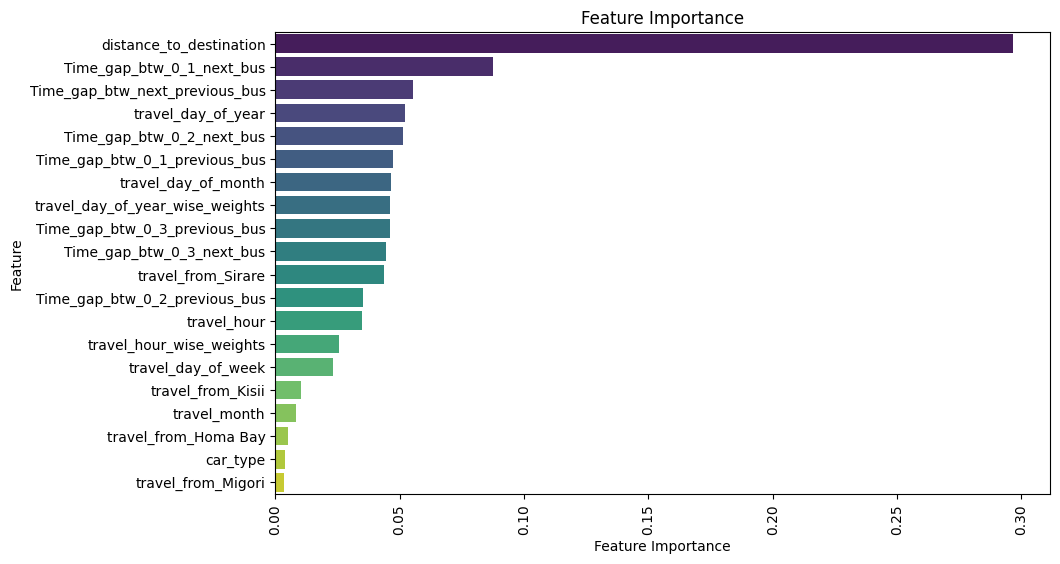

In [96]:
#plotting the important fetures obtainind from the optimal RF model
fig = plt.figure(figsize=(10,6))
sns.barplot(x = 'Feature Importance', y = 'Feature', data=important_features, palette= 'viridis')
plt.xticks(rotation=90)
plt.title('Feature Importance')

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [74]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [75]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***